# **Amazon Fine Food Reviews**

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.


We have the following columns:

Product Id: Unique identifier for the product

User Id: unique identifier for the user

Profile Name: Profile name of the user

Helpfulness Numerator: Number of users who found the review helpful

Helpfulness Denominator: Number of users who indicated whether they found the review helpful or not

Score: Rating between 1 and 5

Time: Timestamp

Summary: Summary of the review

Text: Review

In [1]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

data=pd.read_csv('/content/drive/MyDrive/NLP FINAL PROJECT/Reviews.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

# EDA

In [5]:
#checking shape of data
data.shape

(568454, 10)

In [6]:
#displaying column names
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
#cheking information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [8]:
#displaying summary statistics of data
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [9]:
#checking for duplicate values
duplicate=data[data.duplicated(subset=['UserId','ProfileName','Time','Text'])]
len(duplicate)

174521

In [10]:
#sample duplicate rows
duplicate[duplicate['UserId']=='A3HDKO7OW0QNK4']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
506516,506517,B0001PB9EA,A3HDKO7OW0QNK4,Canadian Fan,0,0,5,1107907200,Authentic Mexican Restaurant Taste,Just as with the Original Tequila Picante Gour...


In [11]:
#droping duplicate rows by keeing first entry
data=data.drop_duplicates(subset=['UserId','ProfileName','Time','Text'],keep='first')
data.shape

(393933, 10)

In [12]:
#checking for null values
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               11
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    3
Text                       0
dtype: int64

In [13]:
#a few null values in profile name and can not fill summary column. so drop the rows contains null valuus 
data=data.dropna(axis=0)
data.shape

(393919, 10)

In [14]:
#Analysing target column
data['Score'].value_counts()

5    250955
4     56094
1     36303
3     29767
2     20800
Name: Score, dtype: int64

In [15]:
#converting multiclass problem in to binary classification
#score > 3 mapped to '1' and <= 3 mapped to '0'
data['Score']=data['Score'].apply(lambda x:1 if x>3 else 0)
data['Score'].value_counts()

1    307049
0     86870
Name: Score, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot of Score')

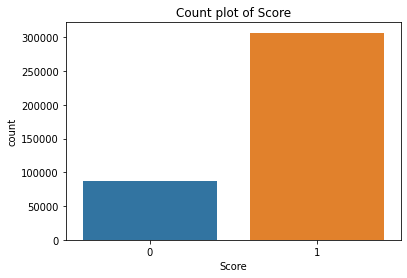

In [16]:
sns.countplot(data['Score'])
plt.title('Count plot of Score')

This is an imbalanced dataset.count of 1 is very much greater than count of 0


 plotting wordcloud to understand the top words that have occured most frequently in the reviews.

In [17]:
from wordcloud import WordCloud

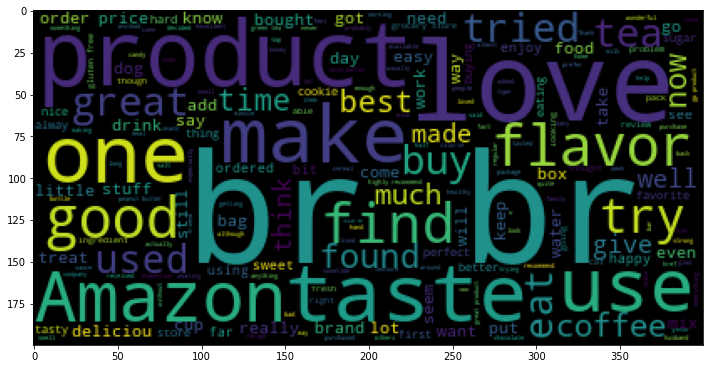

In [18]:
plt.figure(figsize=(12,12))
df_positive=data[data['Score']==1]
text=" ".join(review for review in df_positive['Text'])
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud)

we can see the presence of words with positive sentiments such as excellent,perfect,good,taste,best,delicious,enjoy,love,great

> Indented block



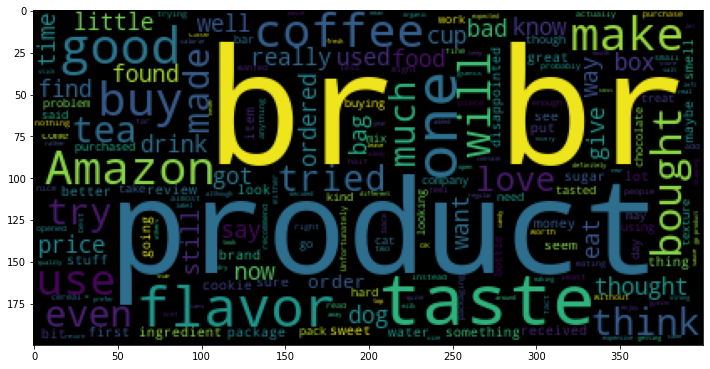

In [19]:
plt.figure(figsize=(12,10))
df_negative=data[data['Score']==0]
text=" ".join(review for review in df_negative['Text'])
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud)

we can see 'br'.so we have to remove HTML tags

In [20]:
helpfulness=data[data['HelpfulnessNumerator']>data['HelpfulnessDenominator']]
helpfulness

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,1,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,1,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


HelpfulnessDenominator should be greater than HelpfulnessNumerator.so we are dropping that rows

In [21]:
data=data.drop([44736,64421],axis=0)
data.shape

(393917, 10)

In [22]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

# **Preprocessing**

1. Remove HTML tags
2. Remove punctuations and special characters
3. Filter for alphabets ,should not contain alpha-neumeric
4. Cnvert the word to lower case
5. Removing stopwords 

In [23]:
#TO expand contractions installing contractions
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import contractions
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize,word_tokenize


In [25]:
#displaying head of column
data['Text'].head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [26]:
sample_contraction=data['Text'][8]
sample_contraction

"Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too"

In [27]:
#contraction on sample
contractions.fix(sample_contraction)

'Right now I am mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too'

In [28]:
nltk.download('stopwords')
print(stopwords.words('english'))
len(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [29]:
#removing 'no', 'nor', 'not' from stopwords
stop_words=set(stopwords.words('english'))-set(['no', 'nor', 'not'])
len(stop_words)

176

In [30]:
cleaned_text=[]
for sentance in data['Text'].values:
  sentance = re.sub(r"http\S+", "", sentance)#to remove urls
  sentance = BeautifulSoup(sentance, 'lxml').get_text() #to remove HTML tags
  sentance=contractions.fix(sentance)#to expand contractions
  sentance = re.sub("\S*\d\S*", "", sentance).strip() #to remove numbers
  sentance = re.sub('[^A-Za-z]+', ' ', sentance)#to get only alphabets
   # removing stop words and join the sentence
  sentance = ' '.join(w.lower() for w in sentance.split() if w.lower() not in stop_words)
  cleaned_text.append(sentance.strip())

In [31]:
cleaned_text[1]

'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted not sure error vendor intended represent product jumbo'

preprocessing is completed.we store cleaned data and necessory columns in a dataframe

In [32]:
#we are predicting sentiment based on review and this reviews are developed over time. 
#so we select these features 
#splitting data into train and test based on Time will make sense
data['clean_text']=cleaned_text
df=data[['Time','clean_text','Score']]
df=df.reset_index(drop=True)
#saving as csv
df.to_csv('final_data.csv',index=False)

In [33]:
df1=pd.read_csv('/content/drive/MyDrive/NLP FINAL PROJECT/final_data.csv')
df1.head()

,Time,clean_text,Score
0,1303862400,bought several vitality canned dog food produc...,1
1,1346976000,product arrived labeled jumbo salted peanuts p...,0
2,1219017600,confection around centuries light pillowy citr...,1
3,1307923200,looking secret ingredient robitussin believe f...,0
4,1350777600,great taffy great price wide assortment yummy ...,1


In [34]:
df1.shape

(393917, 3)

In [35]:
df=df1[0:1000]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Time        1000 non-null   int64 
 1   clean_text  998 non-null    object
 2   Score       1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [37]:
df.isnull().sum()

Time          0
clean_text    2
Score         0
dtype: int64

In [38]:
#there is null values in clean_text.so we are dropping that rows
df=df.dropna(axis=0)
df.shape

(998, 3)

In [39]:
#now we are sorting the data based on time
df['Time']=pd.to_datetime(df['Time'])#,unit='s')
df['Time'].head()

0   1970-01-01 00:00:01.303862400
1   1970-01-01 00:00:01.346976000
2   1970-01-01 00:00:01.219017600
3   1970-01-01 00:00:01.307923200
4   1970-01-01 00:00:01.350777600
Name: Time, dtype: datetime64[ns]

In [40]:
df=df.sort_values('Time')
df=df.reset_index(drop=True)
df.head()

,Time,clean_text,Score
0,1970-01-01 00:00:01.107820800,not know cactus tequila unique combination ing...,1
1,1970-01-01 00:00:01.158537600,cannot believe wonderful chip slightly spicy t...,1
2,1970-01-01 00:00:01.163376000,mccann instant oatmeal great must oatmeal scra...,1
3,1970-01-01 00:00:01.166313600,good instant oatmeal best oatmeal brand uses c...,1
4,1970-01-01 00:00:01.168300800,cancelled order cancelled without problem posi...,0


In [41]:
from nltk.stem import SnowballStemmer
s_stemmer=SnowballStemmer(language='english')

In [42]:
corpus = []
for i in range(0, len(df)):
    review=re.sub('[^a-zA-Z]',' ',df['clean_text'][i])
    review = review.lower()
    review = review.split()
    
    review=[s_stemmer.stem(word) for word in review] 
    review = ' '.join(review)
    corpus.append(review)

In [43]:
len(corpus)

998

In [44]:
#converting to vector
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(ngram_range=(2,2))
traindataset=vectorizer.fit_transform(corpus)

In [45]:
# #converting to vector
# #BOW
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer(max_features=2500,binary=True)
# traindataset=cv.fit_transform(corpus).toarray()

In [46]:
traindataset[0]

<1x27500 sparse matrix of type '<class 'numpy.float64'>'
	with 63 stored elements in Compressed Sparse Row format>

In [47]:
x=traindataset
y=df['Score']

In [48]:
#splitting as training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =0,test_size=0.3)

In [49]:
# import necessary libraries and fitting with different models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

In [62]:
models=  {'RandomForestClassifier':RandomForestClassifier(n_estimators=200,criterion='entropy'),
          'LogisticRegression':LogisticRegression(),
          'KNeighborsClassifier':KNeighborsClassifier(),
          'SVC':SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'BernoulliNB':BernoulliNB(),
          'XGBClassifier':XGBClassifier(),
          'multi_nb':MultinomialNB()}

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name+'  trained')

RandomForestClassifier  trained
LogisticRegression  trained
KNeighborsClassifier  trained
SVC  trained
DecisionTreeClassifier  trained
BernoulliNB  trained
XGBClassifier  trained
multi_nb  trained


In [63]:
# Evaluate the performance
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [64]:
model_test_acc=[]
model_test_recall_score=[]
model_test_f1_score=[]
model_test_precision_score=[]
model_conf_mat=[]
#checking the scores of classifiers
for name,model in models.items():
    y_pred=model.predict(x_test)
    model_test_acc.append(accuracy_score(y_test,y_pred))
    model_test_recall_score.append(recall_score(y_test,y_pred))
    model_test_f1_score.append(f1_score(y_test,y_pred))
    model_test_precision_score.append(precision_score(y_test,y_pred))
    model_conf_mat.append(confusion_matrix(y_test,y_pred))
    
confusion_matrix1={'Random Forest':model_conf_mat[0],
                  'Logistic regression':model_conf_mat[1],
                  'KNN':model_conf_mat[2],
                  'SVC':model_conf_mat[3],
                  'DecisionTree':model_conf_mat[4],
                  'BernolliNB':model_conf_mat[5],
                  'XGBClassifier':model_conf_mat[6],
                  'multi_nb':model_conf_mat[7]}
confusion_matrix1

{'Random Forest': array([[  0,  68],
        [  0, 232]]), 'Logistic regression': array([[  0,  68],
        [  0, 232]]), 'KNN': array([[ 12,  56],
        [ 10, 222]]), 'SVC': array([[  0,  68],
        [  0, 232]]), 'DecisionTree': array([[ 14,  54],
        [ 21, 211]]), 'BernolliNB': array([[  3,  65],
        [  7, 225]]), 'XGBClassifier': array([[  6,  62],
        [  6, 226]]), 'multi_nb': array([[  0,  68],
        [  0, 232]])}

In [65]:
Models = ['Random Forest','Logistic regression','KNN','SVC','DecisionTree','BernolliNB','XGBClassifier','multi_nb']
model_performance = pd.DataFrame({
    'Model':Models,
    'Accuracy_score':model_test_acc,
    'F1_score':model_test_f1_score,
    'Recall_score':model_test_recall_score,
    'Precision_score':model_test_precision_score
    })
model_performance

,Model,Accuracy_score,F1_score,Recall_score,Precision_score
0,Random Forest,0.773333,0.872180,1.000000,0.773333
1,Logistic regression,0.773333,0.872180,1.000000,0.773333
2,KNN,0.780000,0.870588,0.956897,0.798561
3,SVC,0.773333,0.872180,1.000000,0.773333
4,DecisionTree,0.750000,0.849095,0.909483,0.796226
5,BernolliNB,0.760000,0.862069,0.969828,0.775862
6,XGBClassifier,0.773333,0.869231,0.974138,0.784722
7,multi_nb,0.773333,0.872180,1.000000,0.773333


In [ ]:
#model is created using sample data